In [62]:
#Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from numpy import asarray
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.arima.model import ARIMA

In [63]:
%store -r df_cleaned

In [64]:
df_cleaned

,week,wPreis,Plz,full,date
date,,,,,
2020-09-14,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
2020-09-14,2020-37,-37.519318,"['25', '24']",A1 & A2 - geschreddert,2020-09-14
2020-09-14,2020-37,-23.445068,"['80', '81', '82', '83', '84', '85', '93', '94']",A3 - geschreddert,2020-09-14
2020-09-14,2020-37,-36.379163,"['70', '71', '73', '74', '75', '76']",A2 & A3 - geschreddert,2020-09-14
2020-09-14,2020-37,-27.983877,"['25', '24']",A2 & A3 - geschreddert,2020-09-14
...,...,...,...,...,...
2024-04-22,2024-17,7.216049,"['50', '51', '52', '53']",A2 & A3 - geschreddert,2024-04-22
2024-04-22,2024-17,33.349057,"['70', '71', '73', '74', '75', '76']",A2 & A3 - geschreddert,2024-04-22
2024-04-22,2024-17,2.409250,"['25', '24']",A2 - geschreddert,2024-04-22


In [65]:
df = df_cleaned  

Extracting one cluster from the dataset for analysis.

In [66]:
TS1 = df[(df['Plz'] == "['25', '24']")]

And from this cluster, extracting one category for analysis.

In [67]:
TS1_A2 = TS1[TS1['full'] == 'A2 -  geschreddert']
TS1_A1A2 = TS1[TS1['full'] == 'A1 & A2 -  geschreddert']
TS1_A2A3 = TS1[TS1['full'] == 'A2 & A3 -  geschreddert']
datasets = [TS1_A2, TS1_A1A2, TS1_A2A3]

# Modelling - Train, test split

In [68]:
len(TS1_A1A2)

187

In [69]:
splitratio = 0.05
nobs = round(len(TS1_A1A2)*splitratio)
df_train, df_test = TS1_A1A2[0:-nobs], TS1_A1A2[-nobs:]

## ARIMA Model


Since the second order differencing has shown to make all clusters stationary, we use d = 2. 
To observe the results of the ARIMA model, we test with value of p = 1 first. 

In [70]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA order parameters (p, d, q)
p = 1  # Autoregression order
d = 0  # Differencing order (0 for no differencing)
q = 0  # Moving Average order

# Fit the ARIMA model
test_model = ARIMA(df_train['wPreis'], order=(p, d, q))
test_result = test_model.fit()

# Print model summary
print(test_result.summary())

# Print AIC, BIC, and other evaluation metrics
print('AIC:', test_result.aic)
print('BIC:', test_result.bic)


                               SARIMAX Results                                
Dep. Variable:                 wPreis   No. Observations:                  178
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -543.126
Date:                Thu, 16 May 2024   AIC                           1092.252
Time:                        14:31:37   BIC                           1101.797
Sample:                             0   HQIC                          1096.123
                                - 178                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8228     17.367      0.047      0.962     -33.215      34.861
ar.L1          0.9854      0.011     87.352      0.000       0.963       1.008
sigma2        25.6555      2.417     10.614      0.0

In [71]:
import warnings

# Filter out the specific warning
warnings.filterwarnings('ignore')

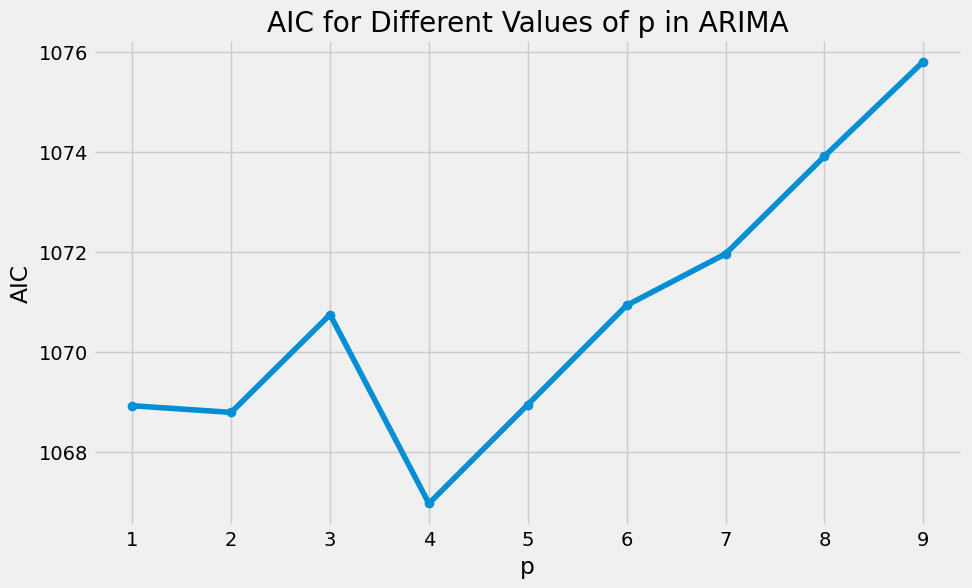

In [72]:
# Define the range of p, d, and q values
# p_values = range(1, 5)
d = 1
q = 0

# Define the range of p values
p_values = range(1, 10)

# Initialize lists to store AIC values
aic_values = []

# Iterate over each value of p
for p in p_values:
    # Fit the ARIMA model
    model = ARIMA(df_train['wPreis'], order=(p, d, q))
    result = model.fit()

    # Store the AIC value
    aic_values.append(result.aic)

# Plot the AIC values
plt.figure(figsize=(10, 6))
plt.plot(p_values, aic_values, marker='o', linestyle='-')
plt.xlabel('p')
plt.ylabel('AIC')
plt.title('AIC for Different Values of p in ARIMA')
plt.grid(True)
plt.xticks(p_values)
plt.show()

In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA order parameters (p, d, q)
p = 4  # Autoregression order
d = 2  # Differencing order (0 for no differencing)
q = 0  # Moving Average order

# Fit the ARIMA model
test_model = ARIMA(df_train['wPreis'], order=(p, d, q))
test_result = test_model.fit()

# Print model summary
print(test_result.summary())

# Print AIC, BIC, and other evaluation metrics
print('AIC:', test_result.aic)
print('BIC:', test_result.bic)


                               SARIMAX Results                                
Dep. Variable:                 wPreis   No. Observations:                  178
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -539.879
Date:                Thu, 16 May 2024   AIC                           1089.759
Time:                        14:31:37   BIC                           1105.611
Sample:                             0   HQIC                          1096.189
                                - 178                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1276      0.078    -14.513      0.000      -1.280      -0.975
ar.L2         -0.9595      0.109     -8.815      0.000      -1.173      -0.746
ar.L3         -0.6097      0.106     -5.758      0.0

### Static forecast using ARIMA


No retraining. We just use the best ARIMA model to forecast for the test set and evaluate.
We use the once-trained best ARIMA model to forecast for the 6 "steps" in one go. 

In [74]:
model = ARIMA(df_train['wPreis'], order=(4, 2, 0))
static_ARIMA = model.fit()

In [75]:
static_ARIMA.forecast(steps=nobs) 

178    19.214558
179    20.182771
180    22.024503
181    23.388642
182    24.229856
183    25.436895
184    26.868479
185    28.099928
186    29.211877
Name: predicted_mean, dtype: float64

The ARIMA forecast function does not require an "input" other than the steps, so either
- we can do a static forecast (train once on the entire training dataset) and test the predictions for the required steps to compare with the test dataset or
- train in a walk-forward validation where we retrain the model with every step of the test dataset on the new training set which includes the new observation

In [76]:
fc = static_ARIMA.forecast(steps=nobs) 
a = np.array(fc)
df_forecast = pd.DataFrame(a, index=df_test.index[-nobs:], columns=['Predicted_wPreis'])


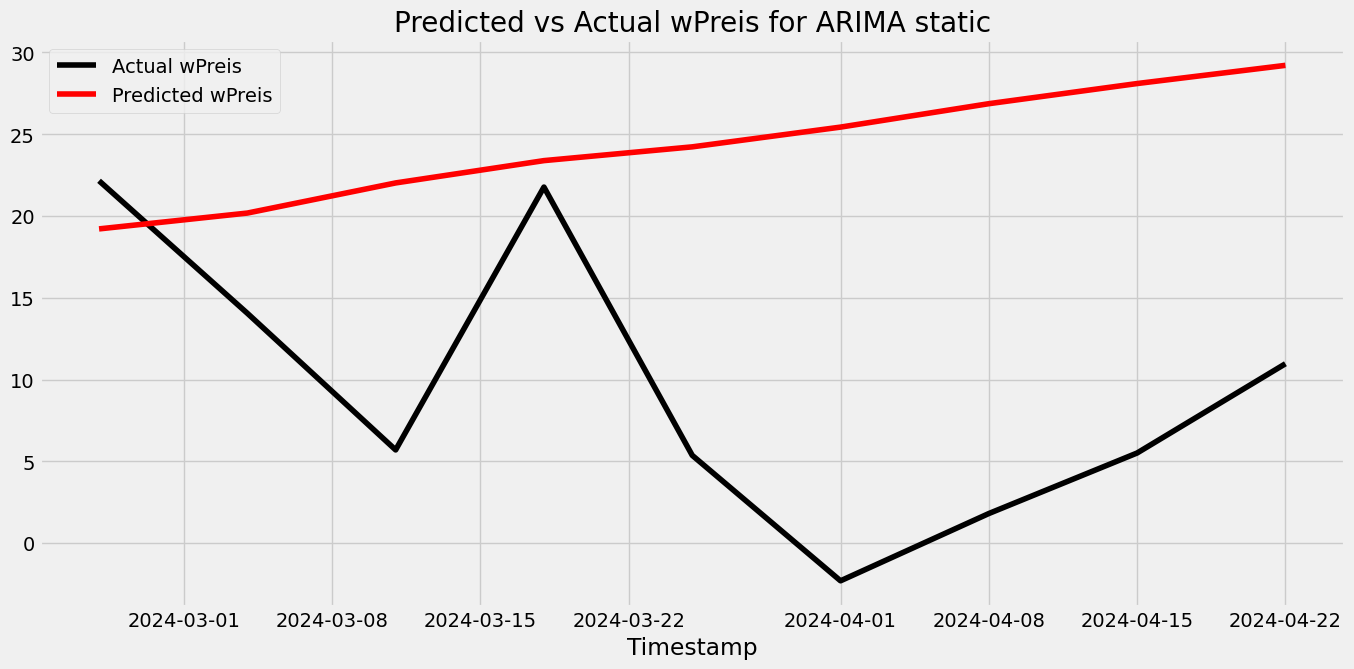

In [77]:
# Plot actual vs predicted values
plt.figure(figsize=(15, 7))
plt.plot(df_test["wPreis"], color='black', label='Actual wPreis')
plt.plot(df_forecast, color='red', label='Predicted wPreis')
plt.xlabel("Timestamp")
plt.grid(True)
plt.legend(loc='upper left')
plt.title('Predicted vs Actual wPreis for ARIMA static')
plt.show()

We will define a forecast accuracyy function that will calculate the mean error, RMSE and also the direction accuracy. 

In [78]:
def forecast_accuracy(forecast, actual):
      mae = mean_absolute_error(actual, forecast)
      me = np.mean(forecast - actual)             # ME
      rmse = np.mean((forecast - actual)**2)**.5  # RMSE
      # Direction accuracy
      forecast_diff = np.diff(forecast)
      actual_diff = np.diff(actual)
      direction_accuracy = np.mean(np.sign(forecast_diff) == np.sign(actual_diff))
    
      return {'mae':mae, 'me': me, 'rmse': rmse, 'direction_accuracy': direction_accuracy}


In [79]:
def adjust(val, length= 6): return str(val).ljust(length) # length
print('ARIMA static forecast Accuracy of: wPreis')
stat_accuracy_prod = forecast_accuracy(df_forecast['Predicted_wPreis'].values, df_test['wPreis'])
for k, v in stat_accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

ARIMA static forecast Accuracy of: wPreis
mae    :  15.4971
me     :  14.8435
rmse   :  17.9825
direction_accuracy :  0.5


# Walk forward validation using ARIMA model

Training the whole model at each iteration including the new observation (for the next day)  

In [80]:
history = [x for x in df_train['wPreis'].values]  
expect=[]

In [81]:
predictions = list()
for t in range(len(df_test)): # iterate over length of test dataset
    model = ARIMA(history, order=(4,2,0))  
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = df_test['wPreis'][t]
    history.append(obs) # append the real observation at each loop
    expect.append(obs)


In [82]:
df_wPreis = pd.DataFrame(
    {'observations': expect,
     'forecast': predictions, 
    })


In [83]:
def adjust(val, length= 10): return str(val).ljust(length) # 10
print('Walk-forward Validation Forecast Accuracy of wPreis')
wf_accuracy_prod = forecast_accuracy(df_wPreis['forecast'].values, df_wPreis['observations'].values)
for k, v in wf_accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Walk-forward Validation Forecast Accuracy of wPreis
mae        :  8.8888
me         :  -0.1336
rmse       :  9.6516
direction_accuracy :  0.375


Here, the me and rmse has improved but the direction_accuracy has decreased even further!

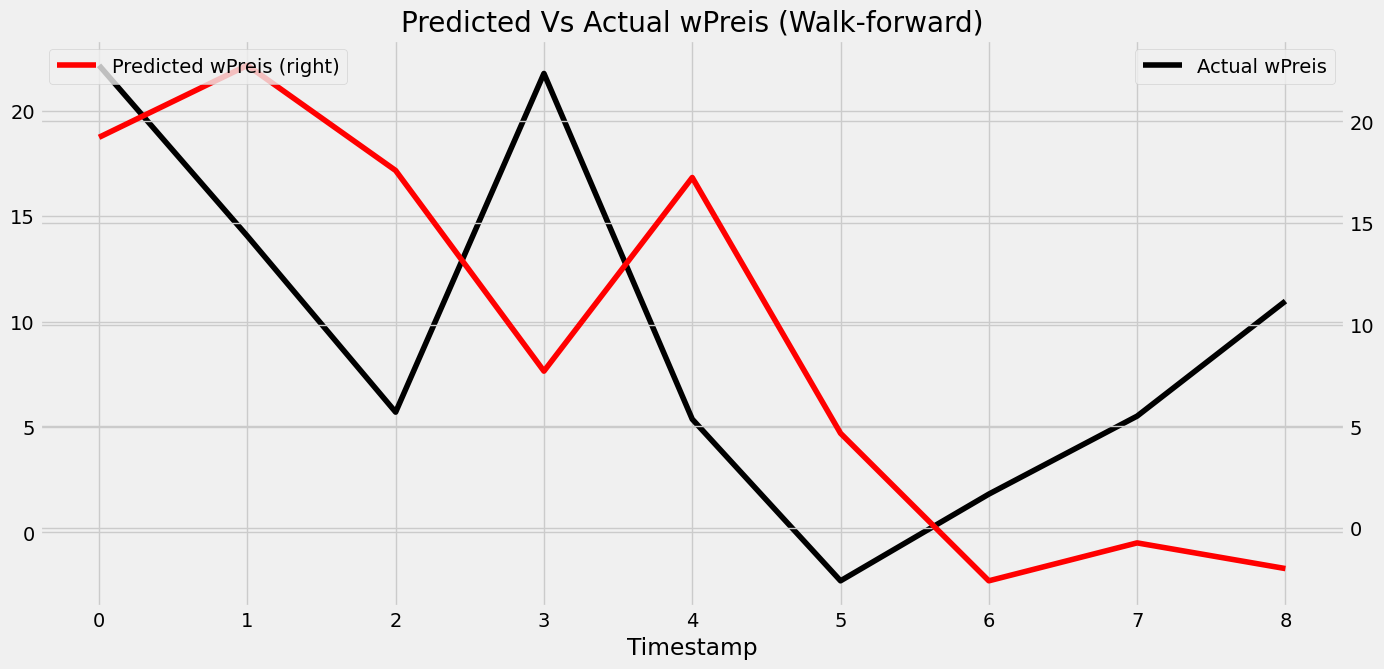

In [84]:
plt.figure(figsize= (15,7))
plt.xlabel("Timestamp")

ax1 = df_wPreis.observations.plot(color = 'black', grid = True, label = 'Actual wPreis')
ax2 = df_wPreis.forecast.plot(color = 'red', grid = True, secondary_y = True, label = 'Predicted wPreis')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted Vs Actual wPreis (Walk-forward)')
plt.show()

In [85]:
ARIMA_static = pd.DataFrame([stat_accuracy_prod])
ARIMA_walk_forward = pd.DataFrame([wf_accuracy_prod])

In [86]:
%store ARIMA_static
%store ARIMA_walk_forward


Stored 'ARIMA_static' (DataFrame)
Stored 'ARIMA_walk_forward' (DataFrame)


## All other clusters and categories

In [87]:
def forecast_accuracy(forecast, actual):
    mae = mean_absolute_error(actual, forecast)
    me = np.mean(forecast - actual)             # ME
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    # Direction accuracy
    forecast_diff = np.diff(forecast)
    actual_diff = np.diff(actual)
    direction_accuracy = np.mean(np.sign(forecast_diff) == np.sign(actual_diff))

    return {'mae':mae, 'me': me, 'rmse': rmse, 'direction_accuracy': direction_accuracy}

In [88]:
# For each dataset data
def static_forecast(data):
    category = data['full'].unique()
    cluster = data['Plz'].unique()
    splitratio = 0.05
    nobs = round(len(data)*splitratio)

    df_train, df_test = data[0:-nobs], data[-nobs:]

    # Static forecast
    model = ARIMA(df_train['wPreis'], order=(4, 2, 0))
    static_ARIMA = model.fit()
    static_ARIMA.forecast(steps=nobs) 
    fc = static_ARIMA.forecast(steps=nobs) 
    a = np.array(fc)
    df_forecast = pd.DataFrame(a, index=df_test.index[-nobs:], columns=['Predicted_wPreis'])

    # def adjust(val, length= 6): return str(val).ljust(length) # length
    # print(f'ARIMA static forecast Accuracy of: wPreis in {cluster} for {category}')
    return forecast_accuracy(df_forecast['Predicted_wPreis'].values, df_test['wPreis'])
    # for k, v in stat_accuracy_prod.items():
    #     print(adjust(k), ': ', round(v,4))




In [89]:
def wf_forecast(data):
    category = data['full'].unique()
    cluster = data['Plz'].unique()
    splitratio = 0.05
    nobs = round(len(data)*splitratio)

    df_train, df_test = data[0:-nobs], data[-nobs:]
    
    history = [x for x in df_train['wPreis'].values] # "list comprehensions". 
    expect=[]

    predictions = list()
    for t in range(len(df_test)): #  
        model = ARIMA(history, order=(4,2,0))  
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = df_test['wPreis'][t]
        history.append(obs) # appends the real observation at each loop! 
        expect.append(obs)

    df_wPreis = pd.DataFrame(
    {'observations': expect,
     'forecast': predictions, 
    })

    # def adjust(val, length= 10): return str(val).ljust(length) # 10
    # print(f'Walk-forward Validation Forecast Accuracy of wPreis in {cluster} for {category}')
    return forecast_accuracy(df_wPreis['forecast'].values, df_wPreis['observations'].values)
    # for k, v in wf_accuracy_prod.items():
    #     print(adjust(k), ': ', round(v,4))


    
 


In [90]:
clusters = df['Plz'].unique() 
datasets = []
for cluster in clusters:
    ds = df[(df['Plz'] == cluster)]
    categories = ds['full'].unique()
    for category in categories:
        datasets.append(ds[ds['full'] == category])





In [91]:
len(datasets)

33

In [92]:
import warnings

# Filter out the specific warning
warnings.filterwarnings('ignore') #, message="A date index has been provided, but it has no associated frequency information")

In [93]:
# Create an empty list to store dictionaries
data = []

# Loop through each category
for dataset in datasets:
    # Perform static forecast
    static_results = static_forecast(dataset)
    
    # Perform walk-forward forecast
    wf_results = wf_forecast(dataset)
    
    # Create a dictionary to store the results
    results_dict = {
        'Cluster': dataset['Plz'].iloc[0],   
        'Category': dataset['full'].iloc[0],   
        'ARIMA_static_mae': static_results['mae'],
        'ARIMA_static_me': static_results['me'],
        'ARIMA_static_rmse': static_results['rmse'],
        'ARIMA_static_direction_accuracy': static_results['direction_accuracy'],
        'ARIMA_wf_mae': wf_results['mae'],
        'ARIMA_wf_me': wf_results['me'],
        'ARIMA_wf_rmse': wf_results['rmse'],
        'ARIMA_wf_direction_accuracy': wf_results['direction_accuracy']
    }
    
    # Append the dictionary to the list
    data.append(results_dict)

# Create a DataFrame from the list of dictionaries
df_results = pd.DataFrame(data)

# Print the DataFrame
# df_results

In [94]:
df_results.to_csv('ARIMA_Results.csv')

In [95]:
df_results['Cluster'].unique()

array(["['25', '24']", "['80', '81', '82', '83', '84', '85', '93', '94']",
       "['70', '71', '73', '74', '75', '76']", "['50', '51', '52', '53']",
       "['40', '41', '42', '44', '45', '46', '47']", "['26', '27', '28']",
       "['48', '49']", "['20', '21', '22', '23']",
       "['10', '11', '12', '13', '14', '15', '16']",
       "['29', '30', '31', '38', '39']"], dtype=object)

In [96]:
df_results['Category'].unique()

array(['A2 -  geschreddert', 'A1 & A2 -  geschreddert',
       'A2 & A3 -  geschreddert', 'A3 -  geschreddert',
       'A2 & A3 -  ungeschreddert', 'A1 & A2 -  ungeschreddert',
       'A3 -  ungeschreddert'], dtype=object)

In [97]:
df_metrics = df_results[['Cluster', 'Category', 'ARIMA_static_rmse', 'ARIMA_wf_rmse', 'ARIMA_static_direction_accuracy', 'ARIMA_wf_direction_accuracy']]

In [98]:
def getRMSEplot(df_plot):
    # Create subplots
    fig, ax = plt.subplots()

    # Define bar width
    bar_width = 0.35

    # Define the positions for the bars
    clusters = df_plot['Cluster']
    static_rmse = df_plot['ARIMA_static_rmse']
    wf_rmse = df_plot['ARIMA_wf_rmse']
    ind = range(len(clusters))

    # Plot the bars
    ax.barh(ind, static_rmse, bar_width, label='ARIMA Static RMSE')
    ax.barh([x + bar_width for x in ind], wf_rmse, bar_width, label='ARIMA Walk-Forward RMSE')

    # Add RMSE values next to each bar
    for i, (s_rmse, wf_rmse) in enumerate(zip(static_rmse, wf_rmse)):
        ax.text(s_rmse, i, f'{s_rmse:.2f}', ha='right', va='center')
        ax.text(wf_rmse, i + bar_width, f'{wf_rmse:.2f}', ha='right', va='center')

    # Set labels and title
    ax.set_xlabel('RMSE')
    ax.set_ylabel('Cluster')
    ax.set_title(f'RMSE comparison of Static and Walk-Forward ARIMA across clusters for {df_plot["Category"].iloc[0]}')

    # Set yticks and labels
    ax.set_yticks(ind)
    ax.set_yticklabels(df_plot['Cluster'])

    # Add legend
    ax.legend()

    # Show plot
    plt.show()

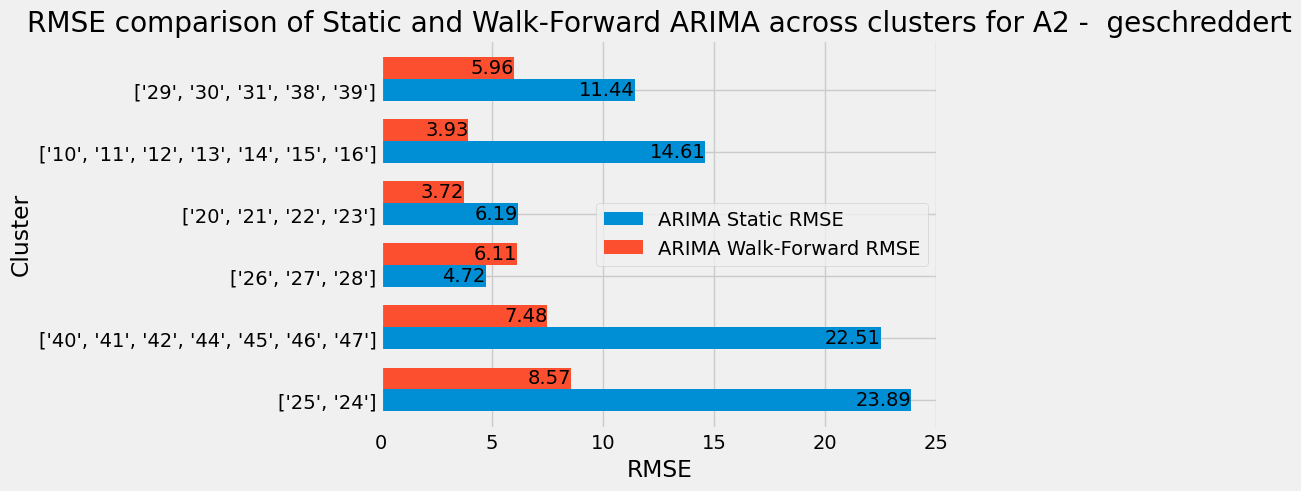

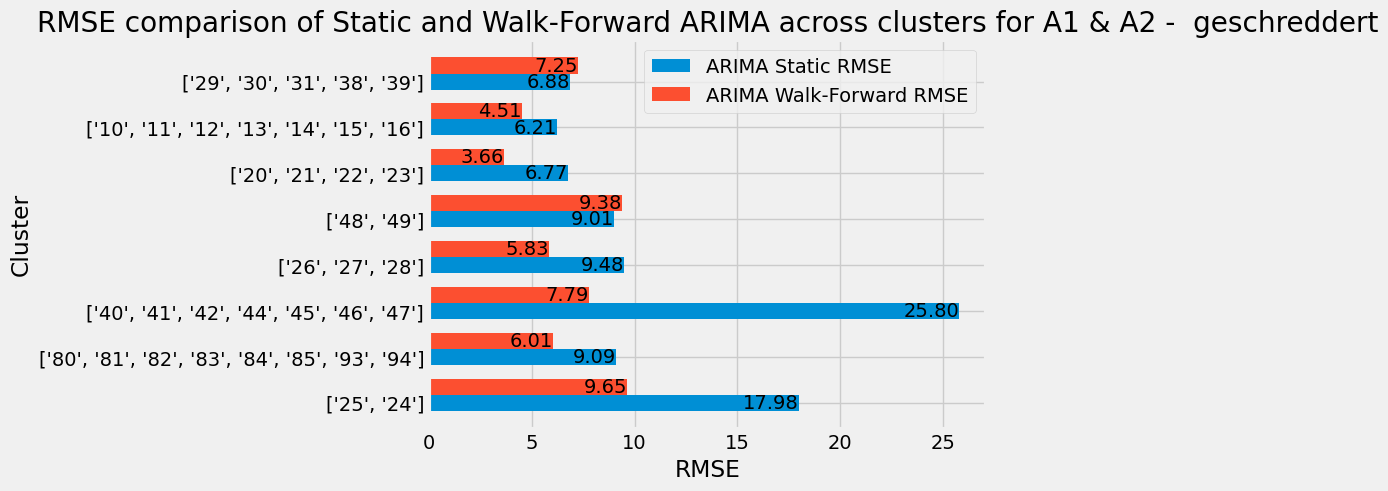

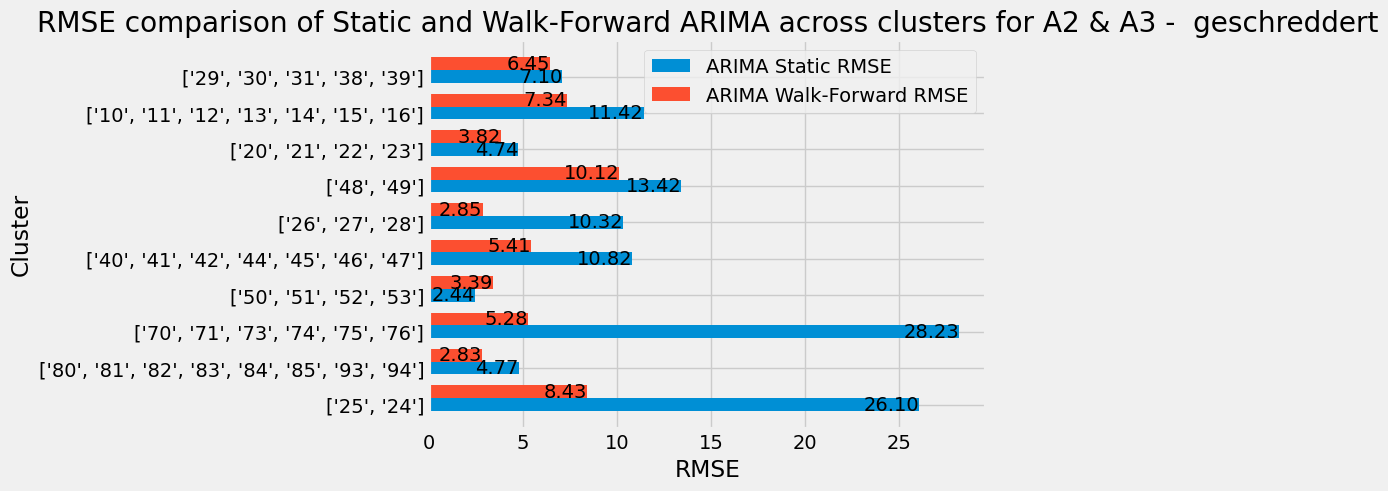

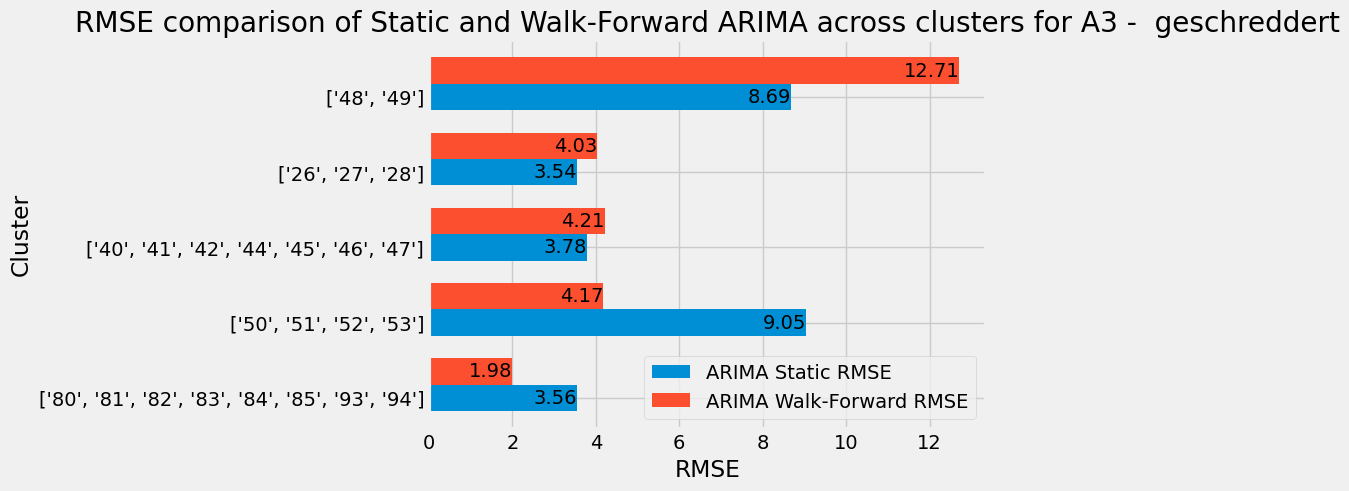

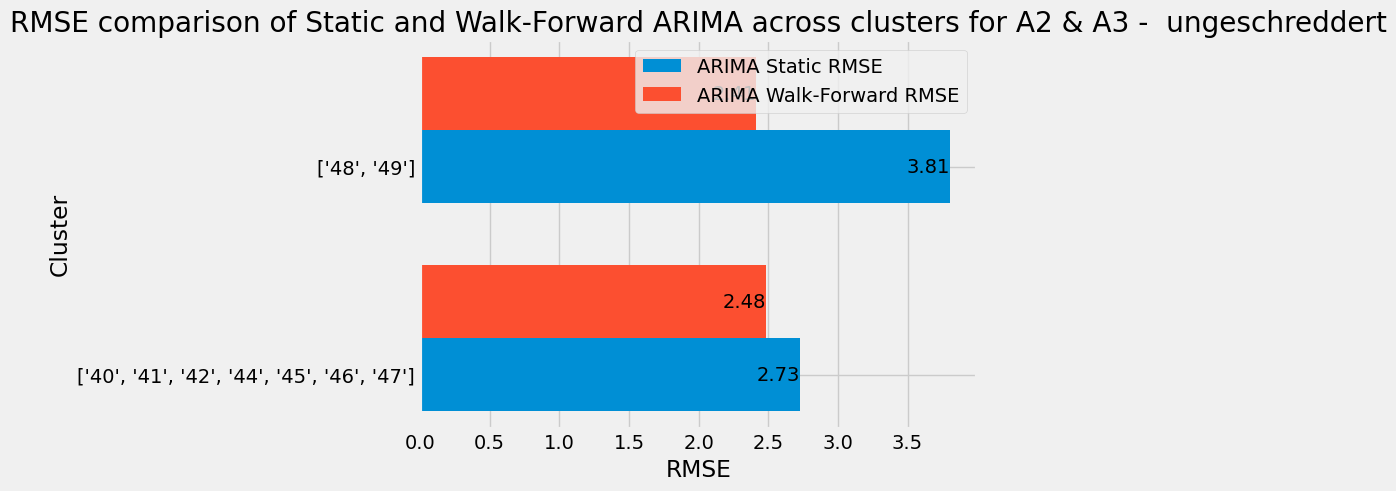

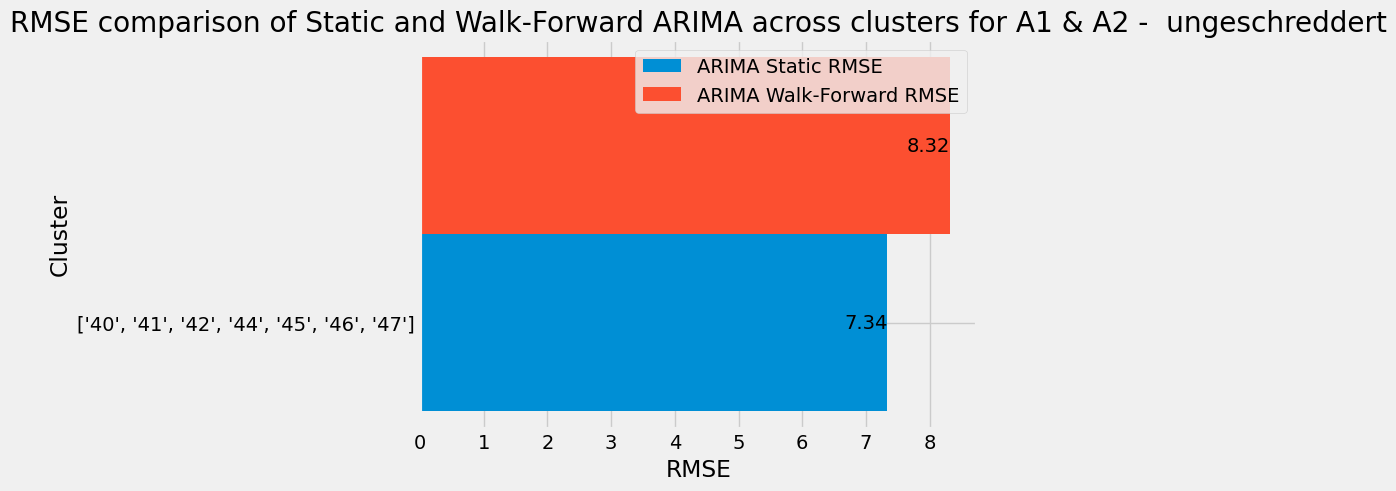

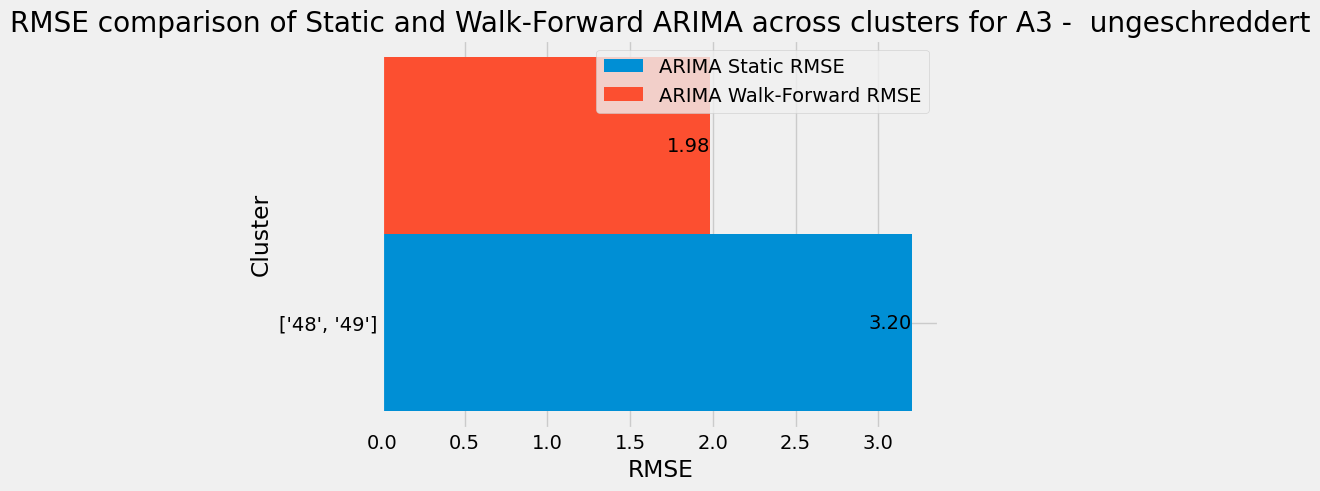

In [99]:
for category in df_metrics['Category'].unique():
   filtered = df_metrics[df_metrics['Category'] == category]
   getRMSEplot(filtered)

In [100]:
def getDirAccplot(df_plot):
    # Create subplots
    fig, ax = plt.subplots()

    # Define bar width
    bar_width = 0.35

    # Define the positions for the bars
    clusters = df_plot['Cluster']
    static_dir_acc = df_plot['ARIMA_static_direction_accuracy']
    wf_dir_acc = df_plot['ARIMA_wf_direction_accuracy']
    ind = range(len(clusters))

    # Plot the bars
    ax.barh(ind, static_dir_acc, bar_width, label='ARIMA Static Direction Accuracy')
    ax.barh([x + bar_width for x in ind], wf_dir_acc, bar_width, label='ARIMA Walk-Forward Direction Accuracy')

    # Add direction accuracy values next to each bar
    for i, (s_dir_acc, wf_dir_acc) in enumerate(zip(static_dir_acc, wf_dir_acc)):
        ax.text(s_dir_acc, i, f'{s_dir_acc:.2f}', ha='right', va='center')
        ax.text(wf_dir_acc, i + bar_width, f'{wf_dir_acc:.2f}', ha='right', va='center')

    # Set labels and title
    ax.set_xlabel('Direction Accuracy')
    ax.set_ylabel('Cluster')
    ax.set_title(f'Directional accuracy comparison of Static and Walk-Forward ARIMA across clusters for {df_plot["Category"].iloc[0]}')

    # Set yticks and labels
    ax.set_yticks(ind)
    ax.set_yticklabels(df_plot['Cluster'])

    # Add legend
    ax.legend()

    # Show plot
    plt.show()

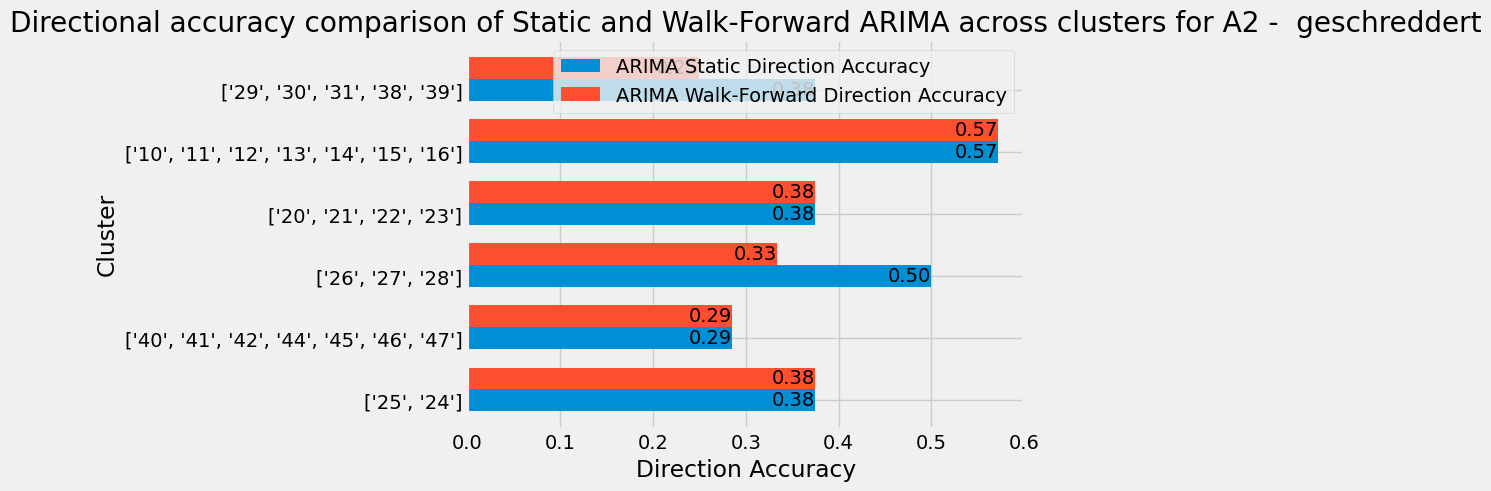

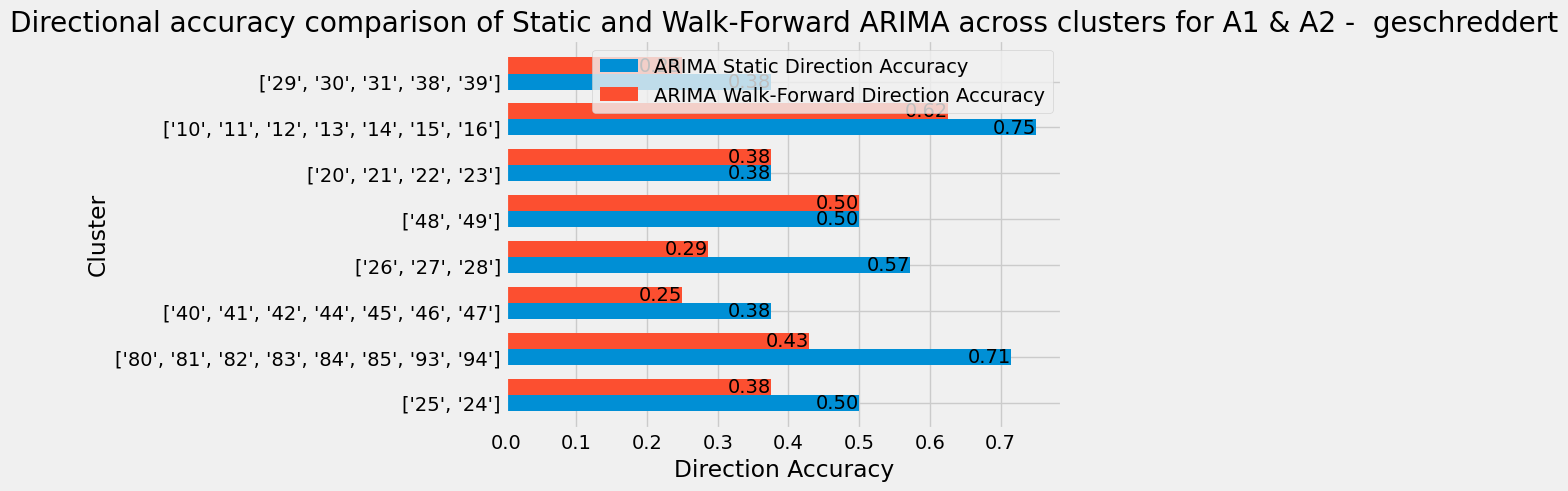

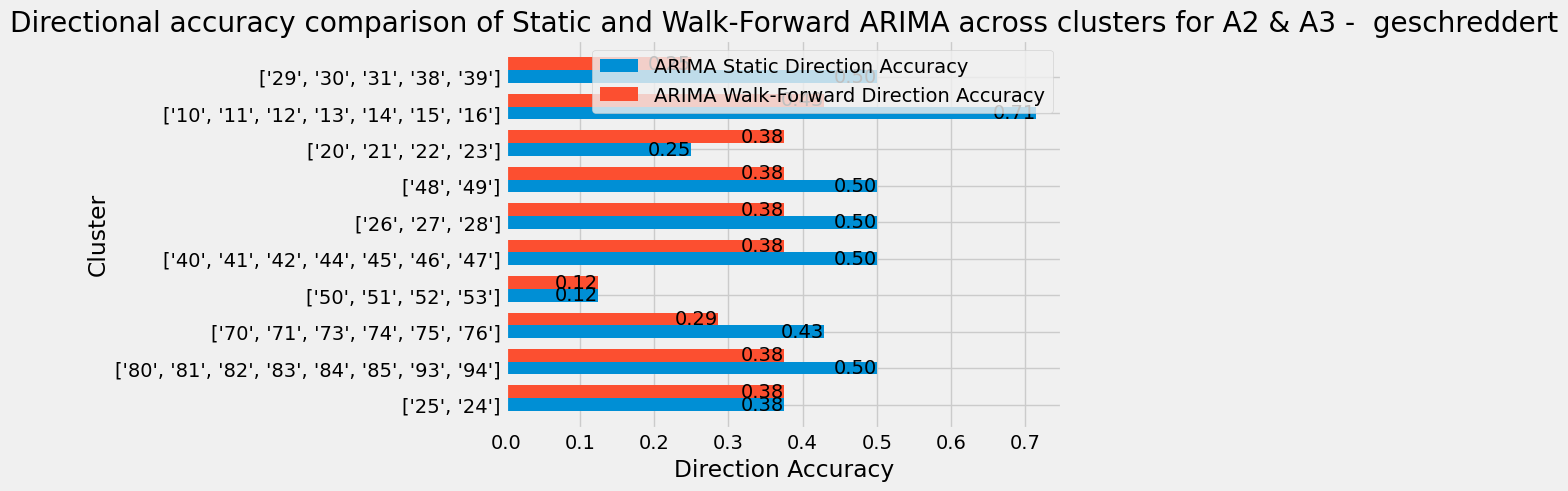

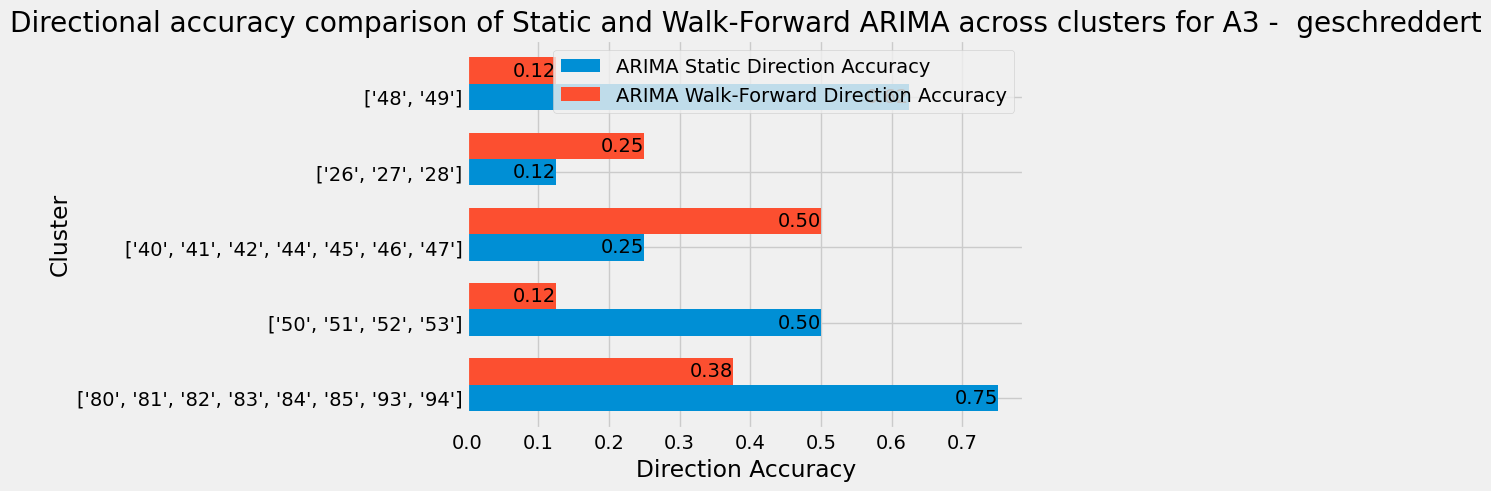

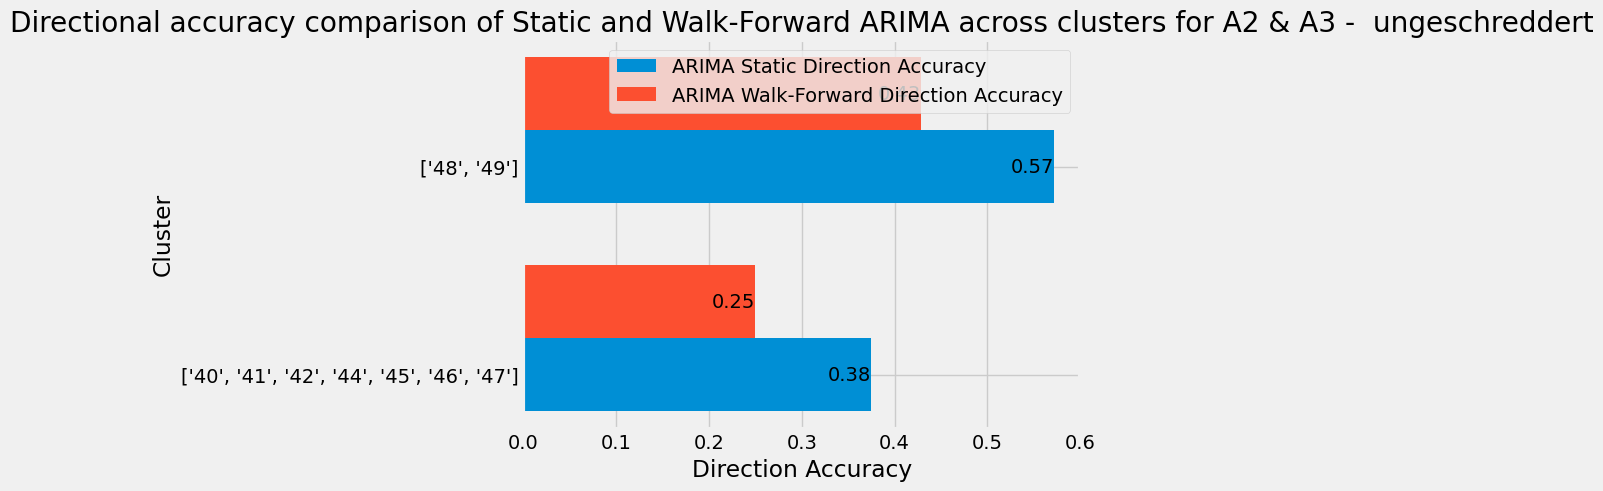

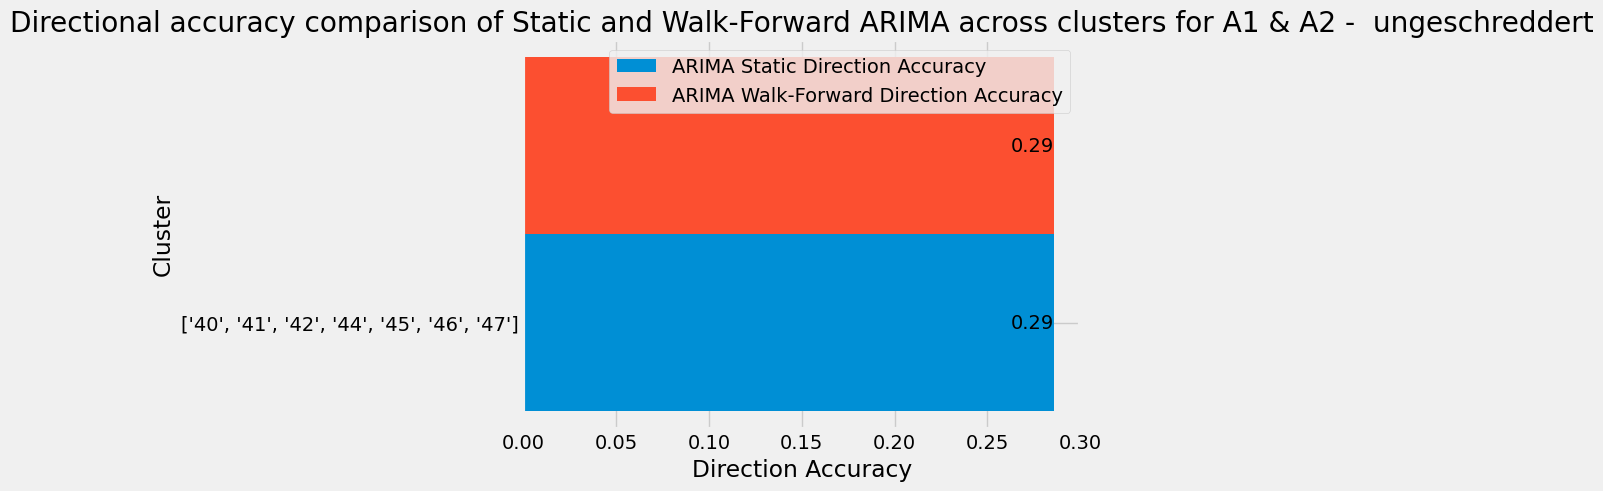

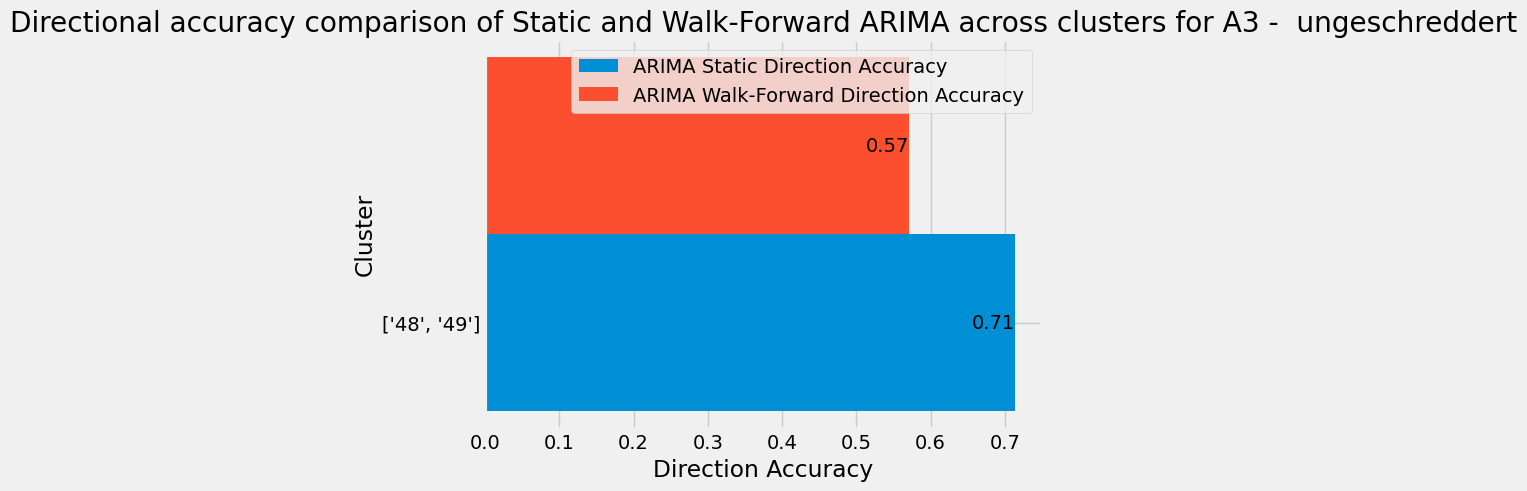

In [101]:
for category in df_metrics['Category'].unique():
   filtered = df_metrics[df_metrics['Category'] == category]
   getDirAccplot(filtered)

PLOTLY GRAPHS FOR THE SAME

In [149]:
def getRMSEplot(df_plot):

    # Filter the dataframe for only the required metrics
    # df_plot = filtered[['Cluster', 'Category', 'ARIMA_static_rmse', 'ARIMA_wf_rmse']]

    # Create traces for each metric
    traces = []
    for metric in ['ARIMA_static_rmse', 'ARIMA_wf_rmse']:
        trace = go.Bar(
            x= df_plot[metric],
            y= df_plot['Cluster'], 
            name=metric,
            orientation='h'
        )
        traces.append(trace)

    # Define layout
    layout = go.Layout(
        title= f'RMSE comparison of Static and Walk-Forward ARIMA across clusters for {df_plot["Category"].iloc[0]}',
        xaxis=dict(title='RMSE'),
        yaxis=dict(title='Cluster'),
        barmode='group'
    )

    # Create figure
    fig = go.Figure(data=traces, layout=layout)

    # Show figure
    fig.show()


In [152]:
def getDirAccplot(df_plot):

    # Filter the dataframe for only the required metrics
    # df_plot = filtered[['Cluster', 'Category', 'ARIMA_static_rmse', 'ARIMA_wf_rmse']]

    # Create traces for each metric
    traces = []
    for metric in ['ARIMA_static_direction_accuracy', 'ARIMA_wf_direction_accuracy']:
        trace = go.Bar(
            x= df_plot[metric],
            y= df_plot['Cluster'], 
            name=metric,
            orientation='h'
        )
        traces.append(trace)

    # Define layout
    layout = go.Layout(
        title= f'Directiona accuracy comparison of Static and Walk-Forward ARIMA across clusters for {df_plot["Category"].iloc[0]}',
        xaxis=dict(title='Direction Accuracy'),
        yaxis=dict(title='Cluster'),
        barmode='group'
    )

    # Create figure
    fig = go.Figure(data=traces, layout=layout)

    # Show figure
    fig.show()


In [153]:
for category in df_metrics['Category'].unique():
    filtered = df_metrics[df_metrics['Category'] == category]
    getRMSEplot(filtered)
    getDirAccplot(filtered)